You conduct an A/B test for your website by showing A to some of your users, and B to others.

 Ad Clicks	Total Views
 A	500	1000
 B	550	1000

 It looks like B is better than A...

# Here the Null Hypothesis is A and B are equal (pA = pB)
# so that the alternative hypothesis is B is better than A( pA != pB)
## Statistical inference for a difference between population proportions
We consider comparing the population proportions of two different populations. 

We make the following definitions:
- $N_A$ (1000) is the number of surveyed people from population $A$  
- $n_A$(500) is the number of successes from population $A$
- $p_A = n_A/N_A$ ( 500/1000 == 0.50) is the proportion of successes from population $A$

Similarly, we define 
- $N_B$(1000) is the number of surveyed people from population $B$  
- $n_B$(550) is the number of successes from population $B$
- $p_B = n_B/N_B$  (550/1000 == 0.55)is the proportion of successes from population $B$

We make the null hypothesis:
$$
H_0\colon \text{$p_A$ and $p_B$ are not same, that is, } p_A - p_B = 0.05
$$
That is, the proportion of successes in the two populations is the same. 

We'll take it as a fact (see Devore Ch. 9.4 or Math 3070) that: 
- $n_A/N_A$ is approximately a normal random variable with mean $p_A$ and variance $\sigma_A^2 = p_A(1-p_A)/N_A$  (0.00025)
- $n_B/N_B$ is approximately a normal random variable with mean $p_B$ and variance $\sigma_B^2 = p_B(1-p_B)/N_B$ (0.0002475)
- $n_A/N_A - n_B/N_B$ is approximately a normal random variable with mean $\mu = 0$ and variance $\sigma^2 = \sigma_A^2 + \sigma_B^2$. 

Here $\hat{p} = \frac{N_A}{N_A + N_B}p_A + \frac{N_B}{N_A + N_B}p_B$ and $\hat{q} = 1-\hat{p}$. 

$\hat{p} = 0.525
    
$\hat{q} = 1-\hat{p}$. == 0.475
 
- The test statistic called the *two-proportion z-value* 
$$
Z = \frac{p_A - p_B}{\sqrt{\hat{p} \hat{q} \left( \frac{1}{N_A} + \frac{1}{N_B} \right)}}.
$$
is approximately  distributed according to the standard normal distribution when $H_0$ is true. Here $\hat{p} = \frac{N_A}{N_A + N_B}p_A + \frac{N_B}{N_A + N_B}p_B$ and $\hat{q} = 1-\hat{p}$. 

From the data, we estimate the mean, $\mu$, to be  $p_A - p_B$. 
    

 Perform a hypothesis test using the two-proportion z-value test.  See the "pooled" version from the table hereLinks to an external site. statistic at both the 5% and 1% signficance levels.

 Begin by formulating and writing down your null hypothesis, then compute the Z value for this trial, and its associated p-value.

 Note: the Z value you compute is assumed to be distributed according to the standard normal distribution (mean = 0, variance = 1). 
We'll consider the "1-sided" p-value which meaures the probability of a sample having a Z value that is more extreme in only one tail (to get the 2-sided value, you'd just multiply by 2).

 What can you conclude?

 Note, to help you understand your results, you might want to tweak the number of clicks for b to see how that changes your results. For example, what do you expect to happen to your p value if b is clicked 560 or 570 times? This is JUST for understanding the results, and shouldn't bias your decision one way or another!

In [1]:
#imports and setup
import pandas as pd
import numpy as np
import scipy as sc
import scipy.stats as stats
import statsmodels.formula.api as sm
from sklearn import linear_model
import matplotlib.pyplot as plt
import math



def hypothesis_test(nA,nB):
    Na = 1000
    pA = nA/Na
   
    Nb = 1000
    pB = nB/Nb
    
    phat = Na*pA/(Na+Nb) + Nb*pB/(Na+Nb)
    qhat = 1-phat
    z = (pA - pB)/math.sqrt(phat*qhat*(1/Na + 1/Nb)) 

    p_value = stats.norm.cdf(z)
    p_value = 2 * p_value

    alpha = 0.05

    if(p_value < alpha):
        result_5 = "The probability significant value "+str(alpha * 100)+"% is less than the P-value, then we conclude that the null hypothesis was incorrect, so we reject it. So Here B is better than A"
    else:
       result_5 = "The probability significant value "+str(alpha * 100)+"% is greater than the P-value, then we conclude that the null hypothesis was correct. So Here B and A have same impact"
    
    print(result_5)
    alpha = 0.01
    if(p_value < alpha):
        result_1 = "The probability significant value "+str(alpha * 100)+"% is less than the P-value, then we conclude that the null hypothesis was incorrect, so we reject it. So Here B is better than A"
    else:
        result_1 = "The probability significant value "+str(alpha * 100)+"% is greater than the P-value, then we conclude that the null hypothesis was correct. So Here B and A have same impact"
    print(result_1)  
    return result_5, result_1


# hypothesis_test for nA = 500 and nB = 550
hypothesis_test_1 = hypothesis_test(500,550)

# hypothesis_test for nA = 500 and nB = 560
hypothesis_test_2 = hypothesis_test(500,560)


# hypothesis_test for nA = 500 and nB = 570
hypothesis_test_3 = hypothesis_test(500,570)


The probability significant value 5.0% is less than the P-value, then we conclude that the null hypothesis was incorrect, so we reject it. So Here B is better than A
The probability significant value 1.0% is greater than the P-value, then we conclude that the null hypothesis was correct. So Here B and A have same impact
The probability significant value 5.0% is less than the P-value, then we conclude that the null hypothesis was incorrect, so we reject it. So Here B is better than A
The probability significant value 1.0% is less than the P-value, then we conclude that the null hypothesis was incorrect, so we reject it. So Here B is better than A
The probability significant value 5.0% is less than the P-value, then we conclude that the null hypothesis was incorrect, so we reject it. So Here B is better than A
The probability significant value 1.0% is less than the P-value, then we conclude that the null hypothesis was incorrect, so we reject it. So Here B is better than A


(348, 206)
(263, 206)
(263, 15)
(262, 16)
(260, 16)
After Cleaning up the data we are left with 260 houses and 16 variables


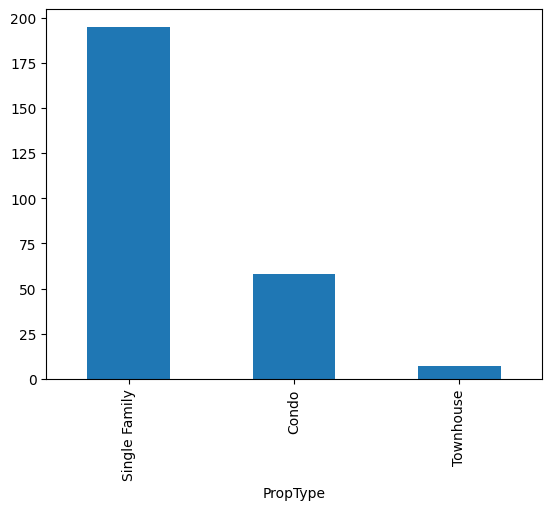

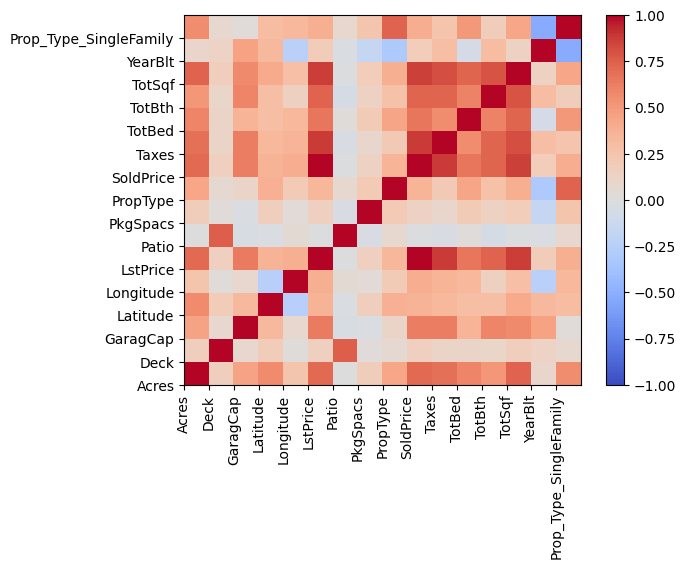

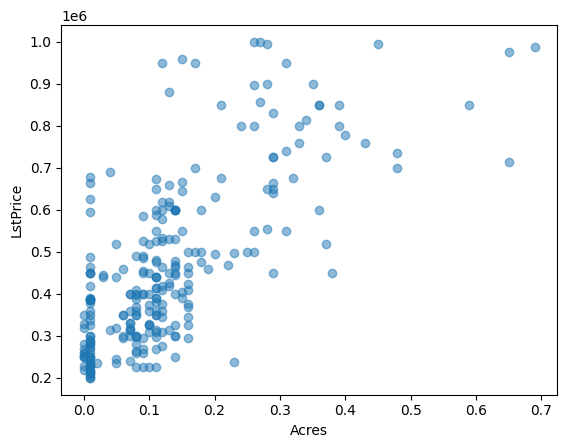

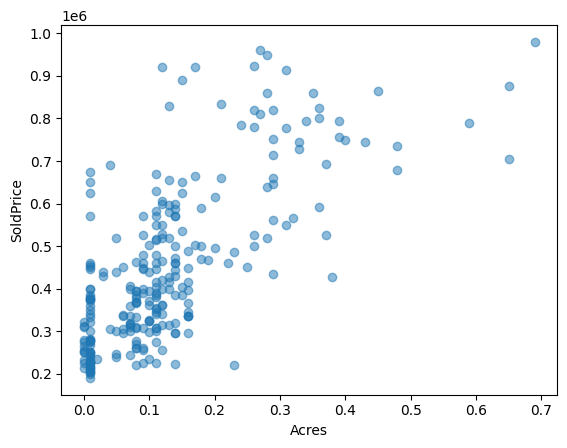

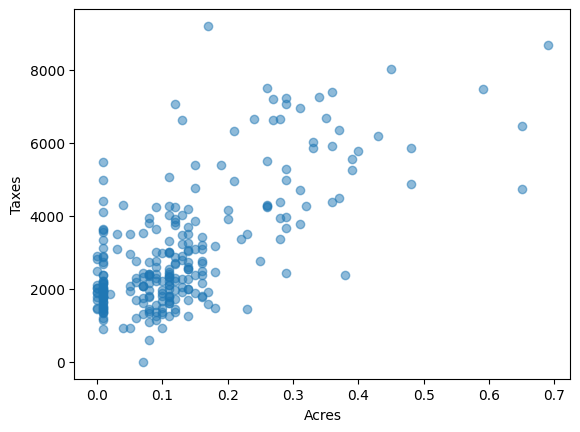

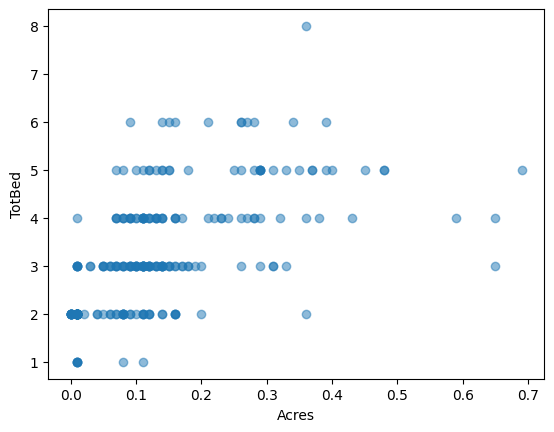

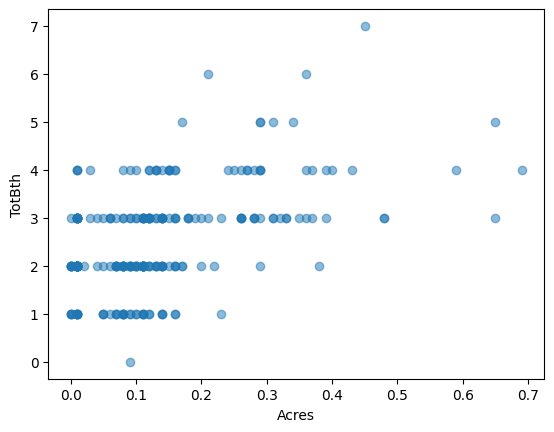

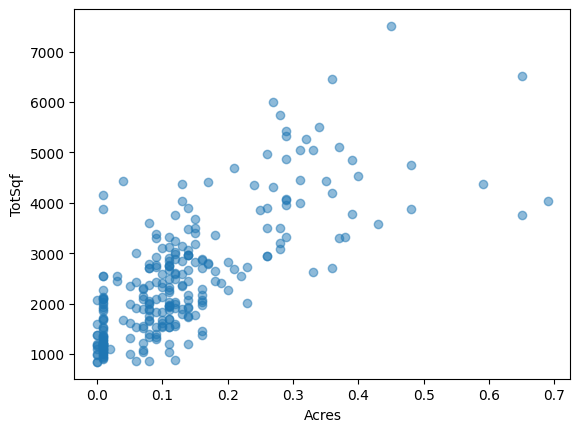

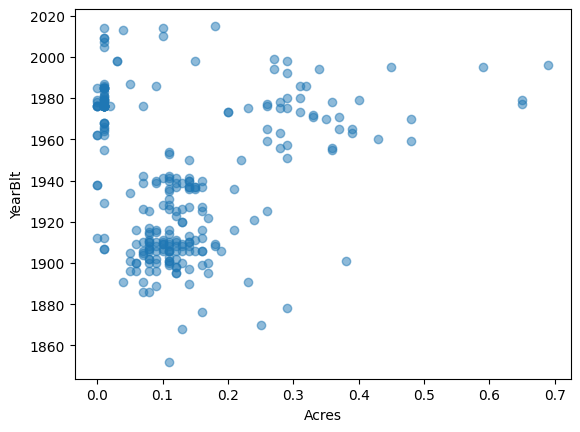

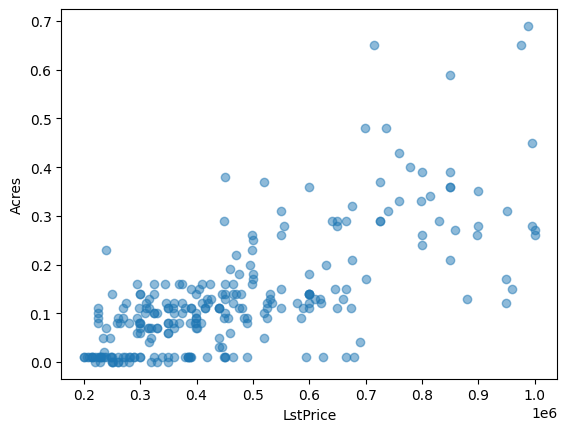

There is a strong correlation between LstPrice and SoldPrice (correlation coefficient = 0.9950960861762019)


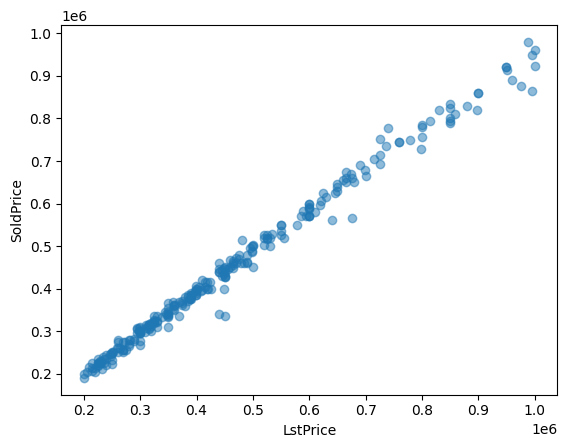

There is a strong correlation between LstPrice and Taxes (correlation coefficient = 0.8823046519955754)


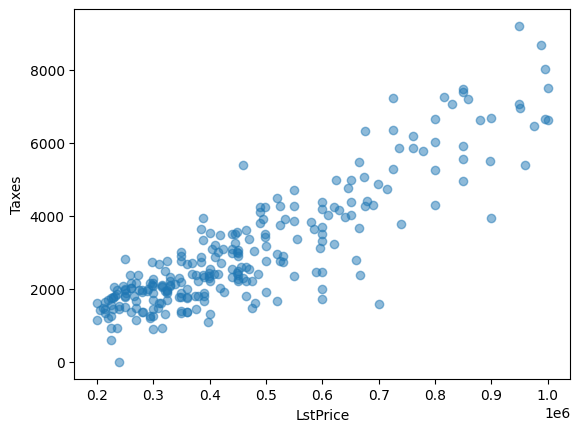

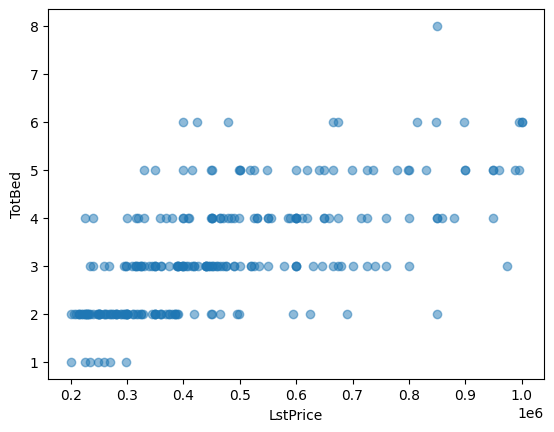

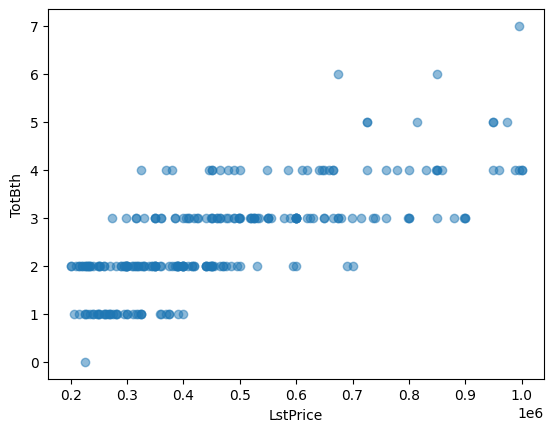

There is a strong correlation between LstPrice and TotSqf (correlation coefficient = 0.8703385525196976)


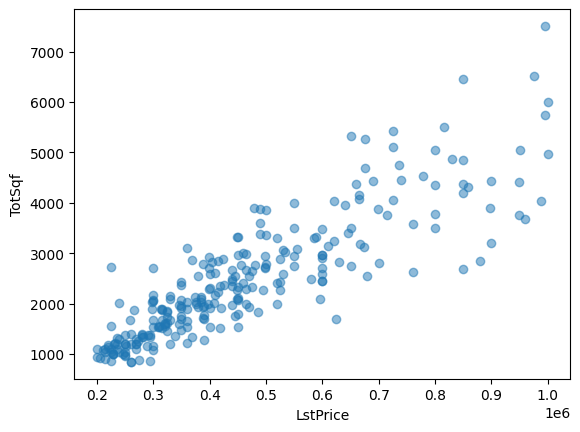

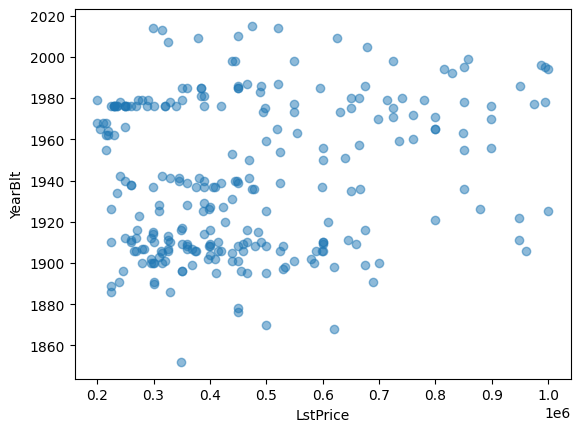

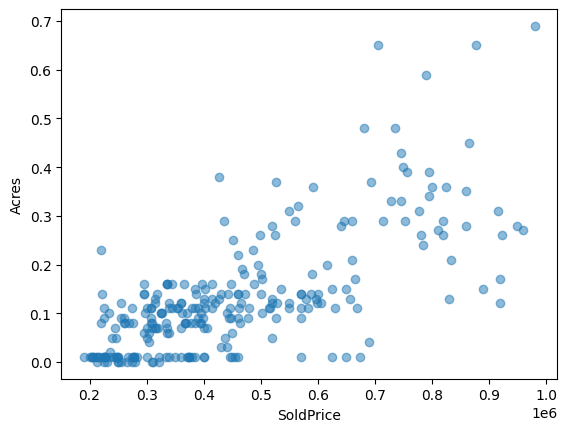

There is a strong correlation between SoldPrice and LstPrice (correlation coefficient = 0.995096086176202)


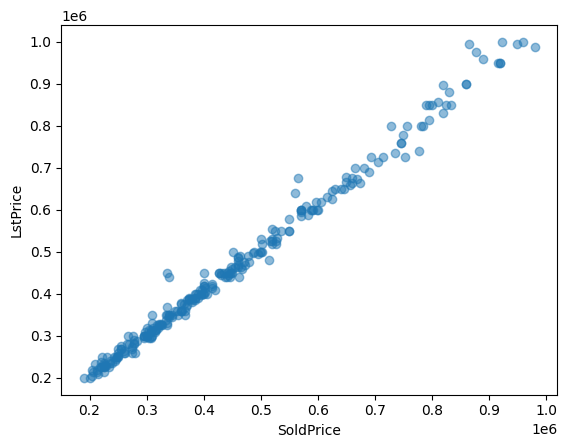

There is a strong correlation between SoldPrice and Taxes (correlation coefficient = 0.8775511926520286)


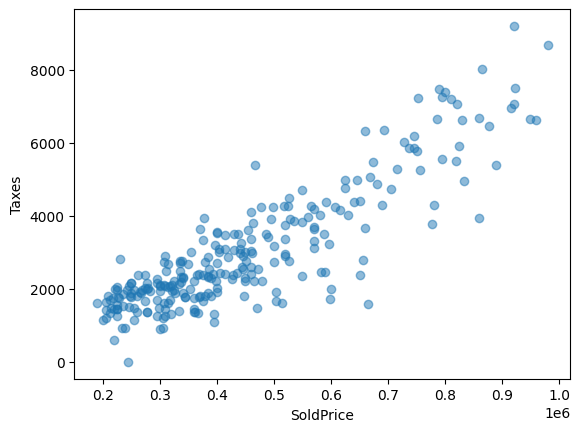

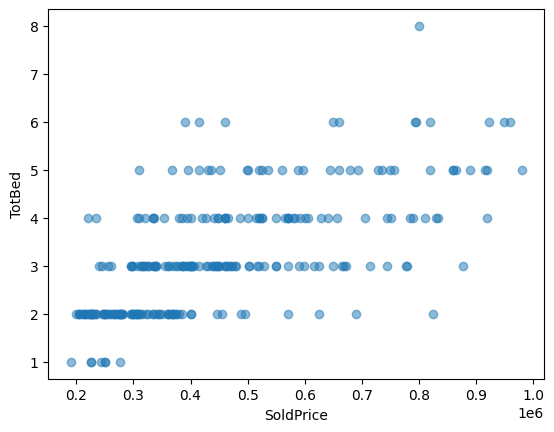

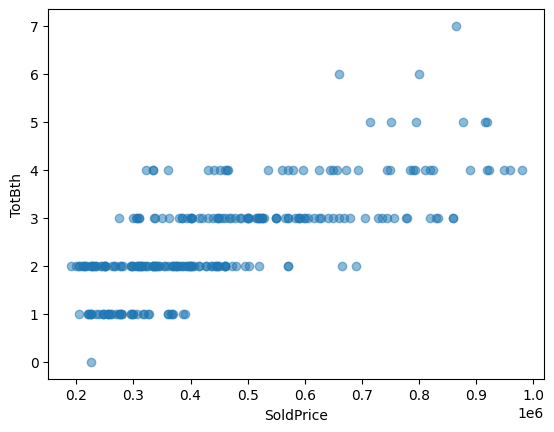

There is a strong correlation between SoldPrice and TotSqf (correlation coefficient = 0.8603026490890224)


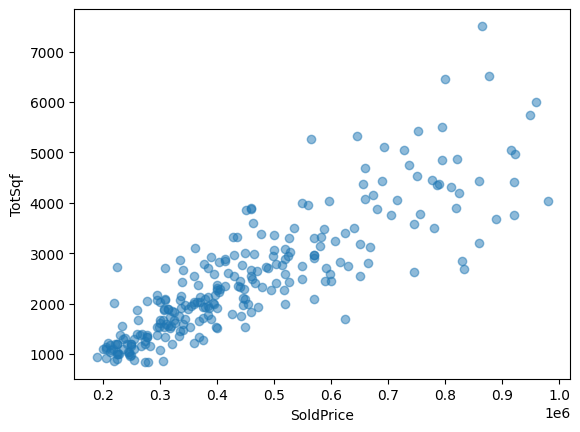

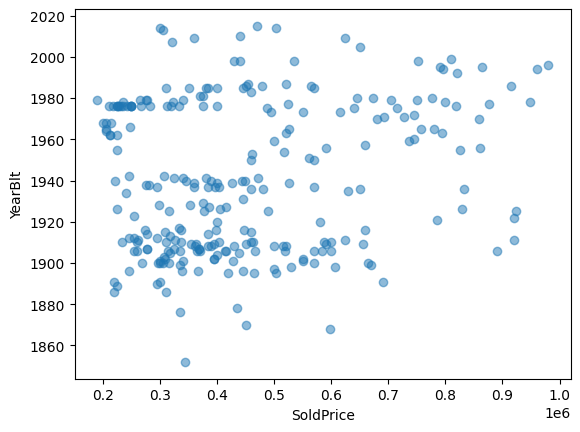

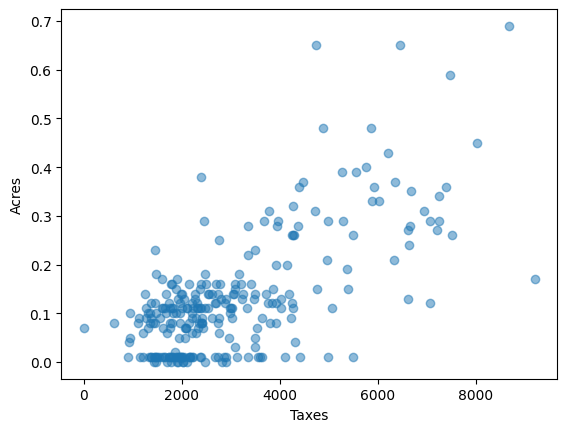

There is a strong correlation between Taxes and LstPrice (correlation coefficient = 0.8823046519955754)


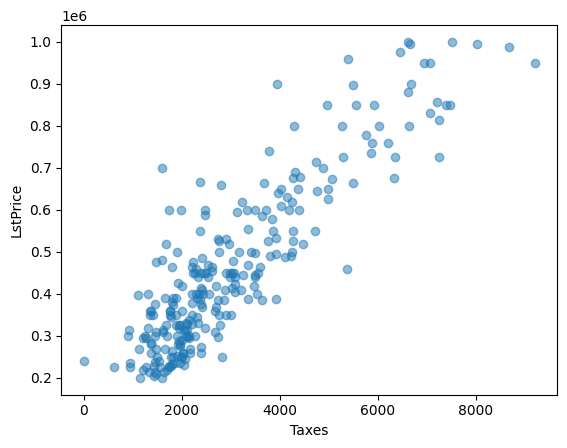

There is a strong correlation between Taxes and SoldPrice (correlation coefficient = 0.8775511926520286)


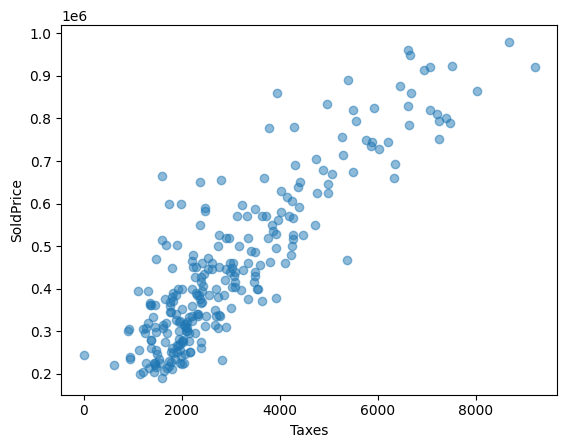

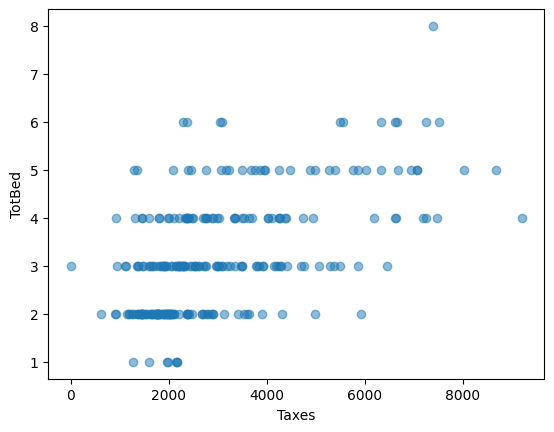

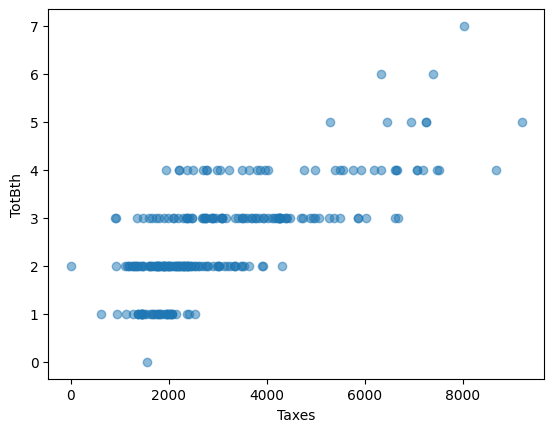

There is a strong correlation between Taxes and TotSqf (correlation coefficient = 0.818888683039854)


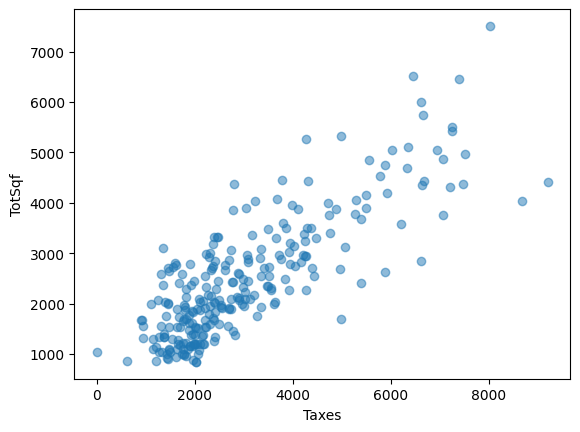

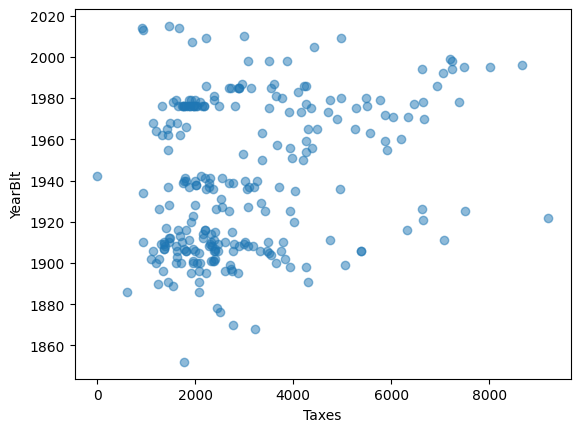

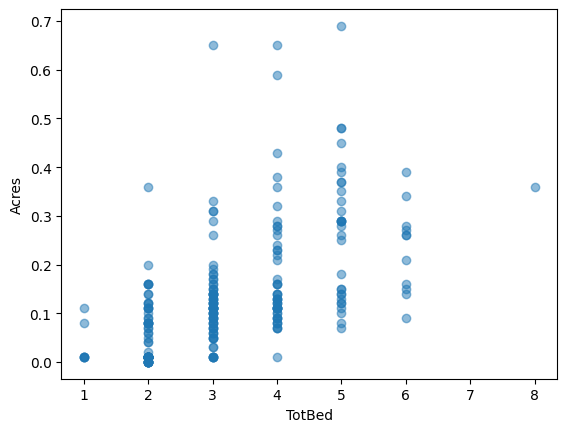

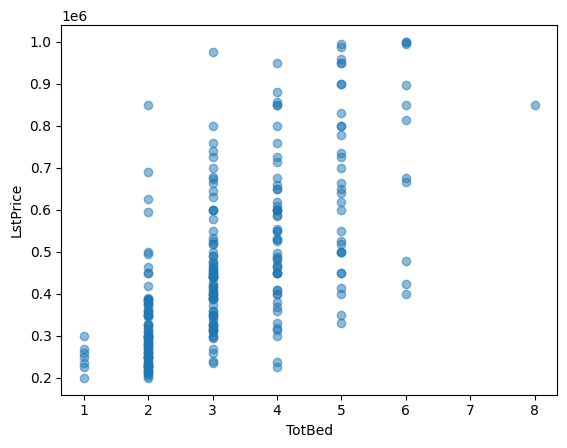

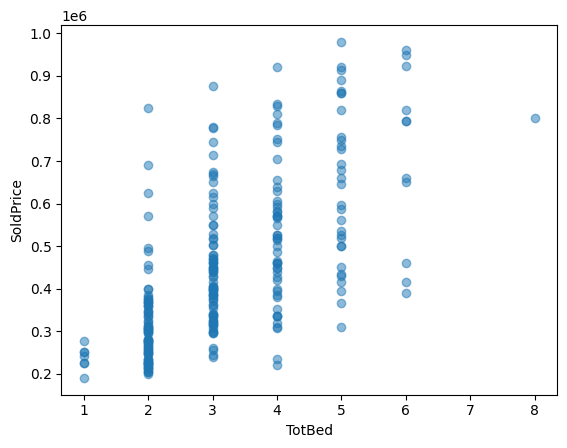

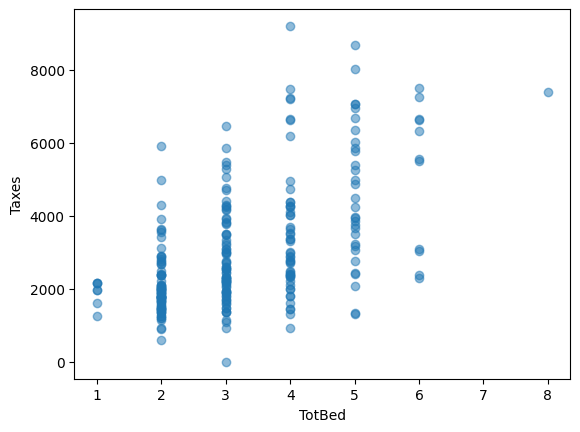

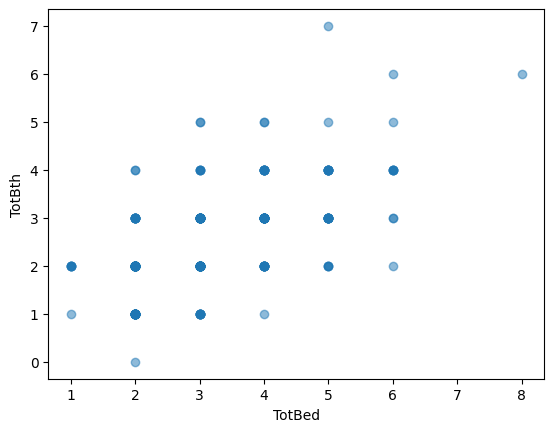

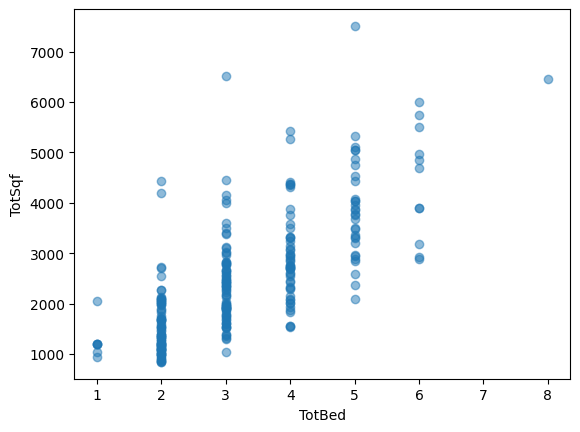

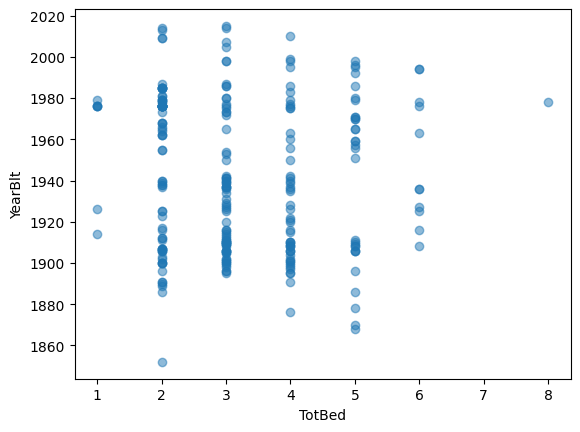

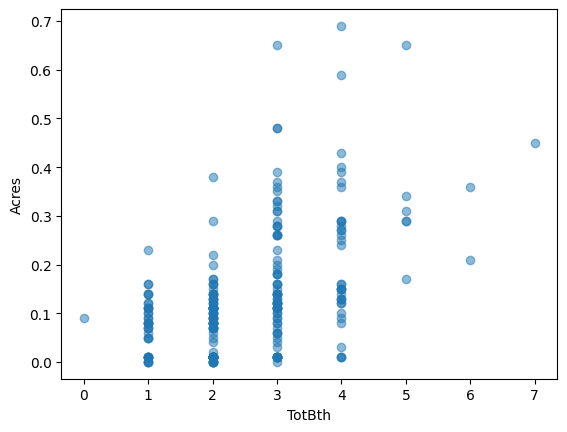

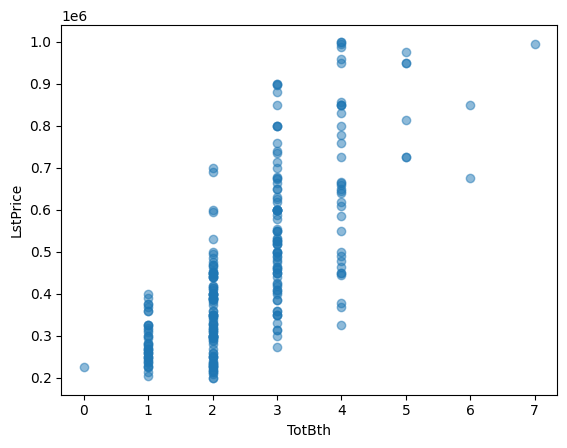

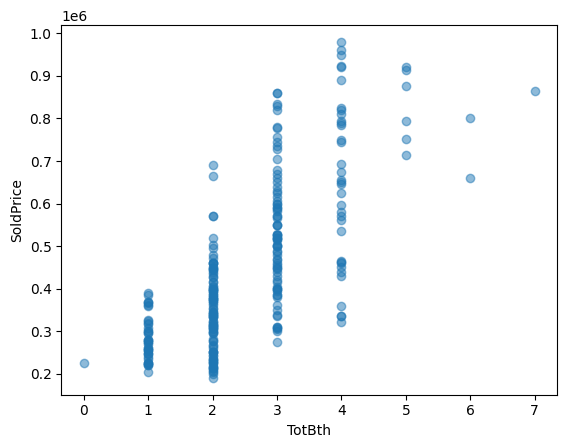

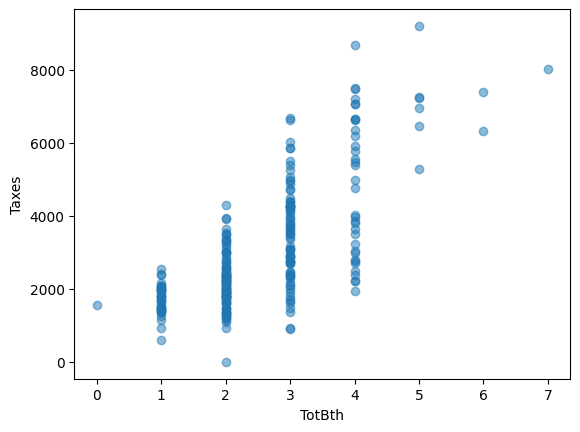

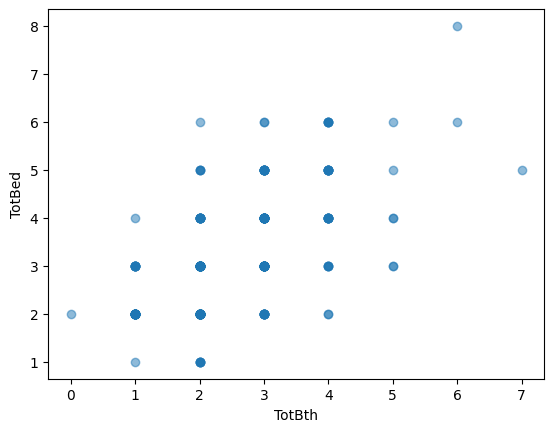

There is a strong correlation between TotBth and TotSqf (correlation coefficient = 0.7892014687765729)


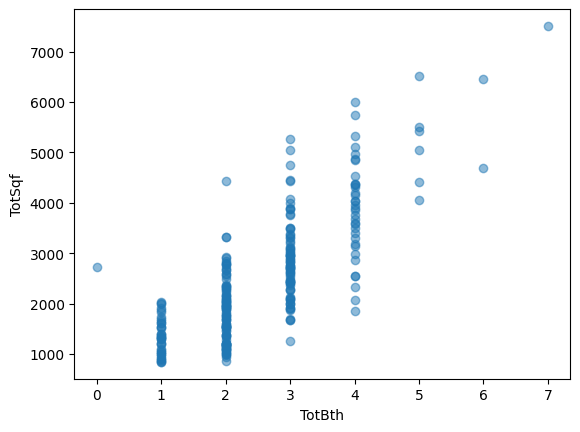

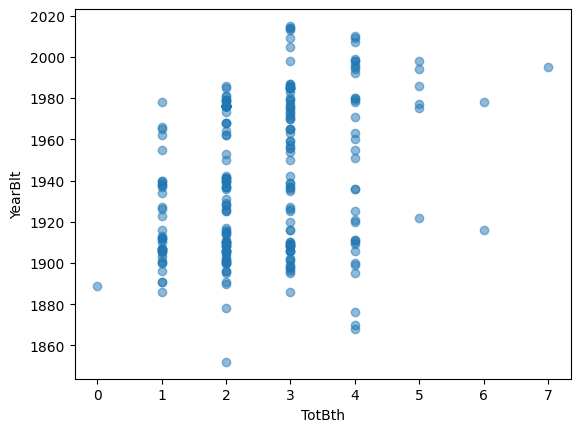

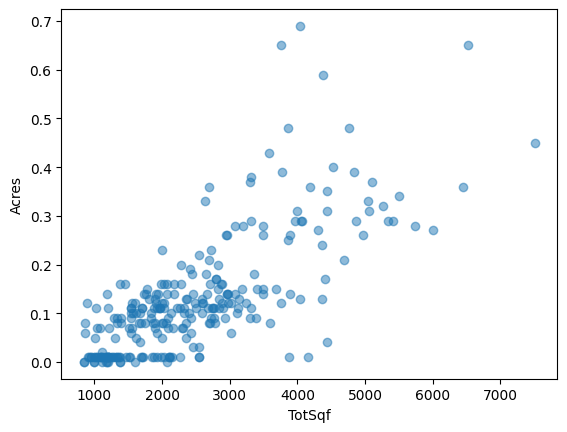

There is a strong correlation between TotSqf and LstPrice (correlation coefficient = 0.8703385525196976)


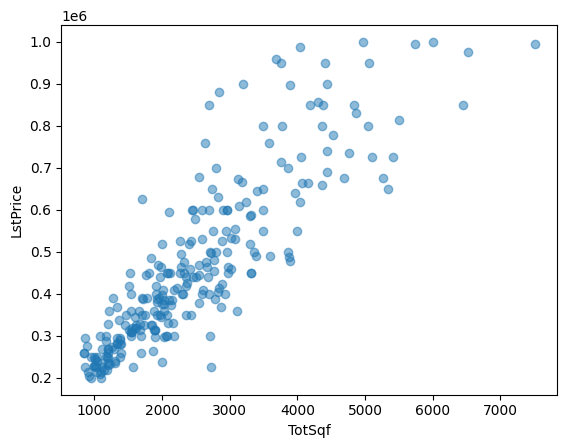

There is a strong correlation between TotSqf and SoldPrice (correlation coefficient = 0.8603026490890225)


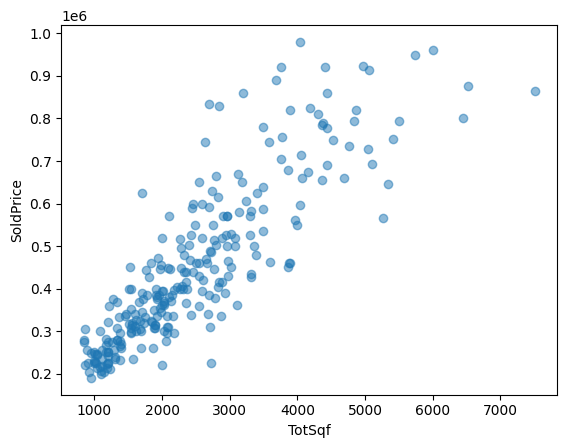

There is a strong correlation between TotSqf and Taxes (correlation coefficient = 0.818888683039854)


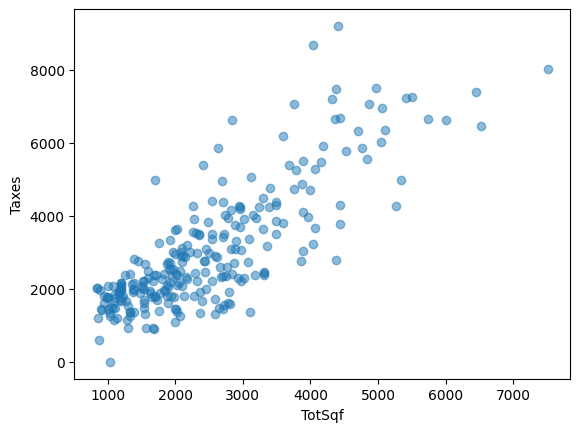

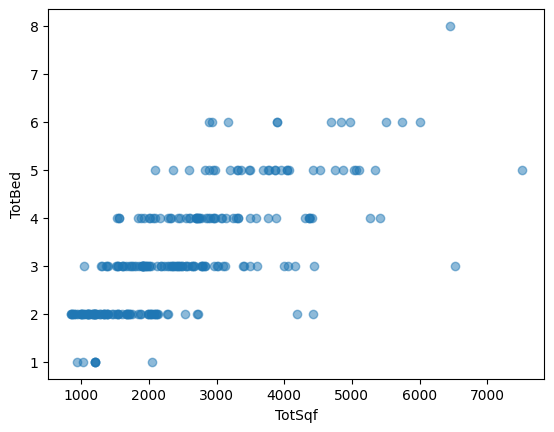

There is a strong correlation between TotSqf and TotBth (correlation coefficient = 0.789201468776573)


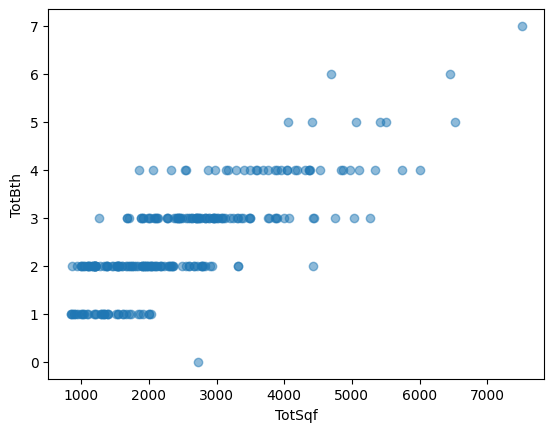

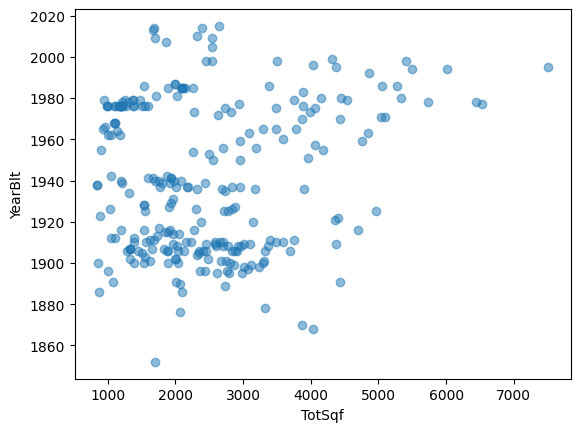

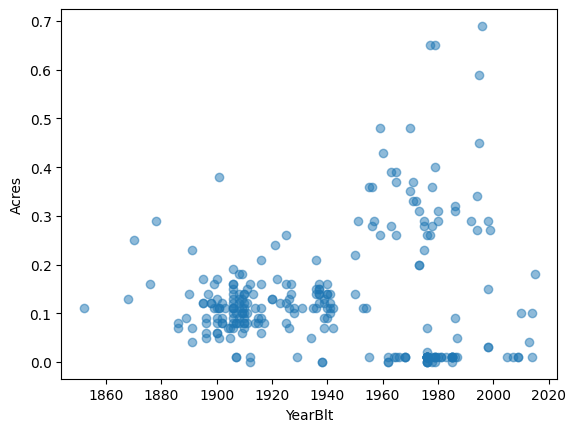

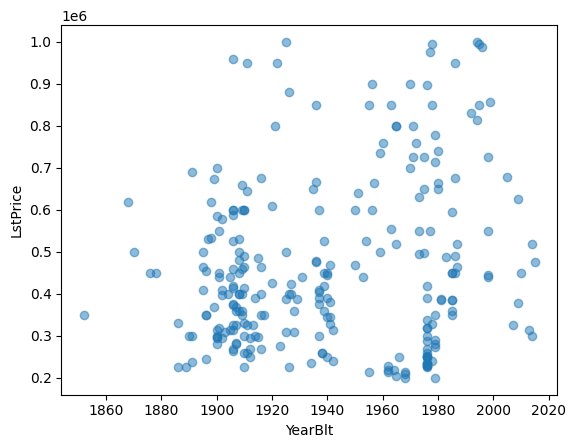

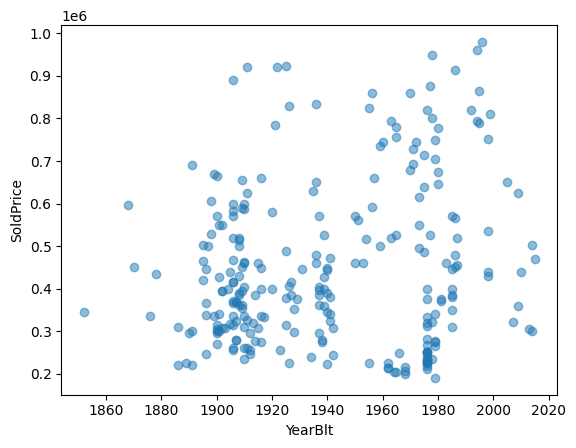

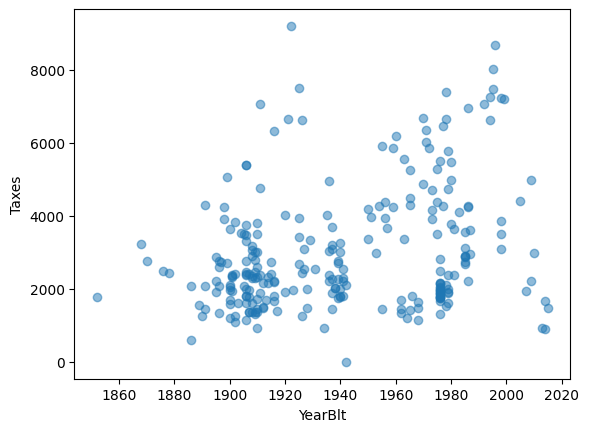

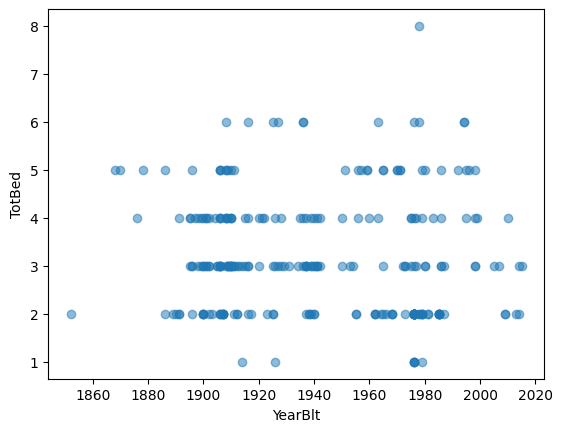

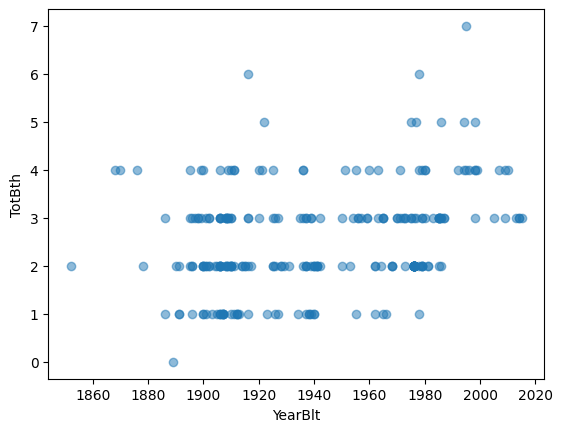

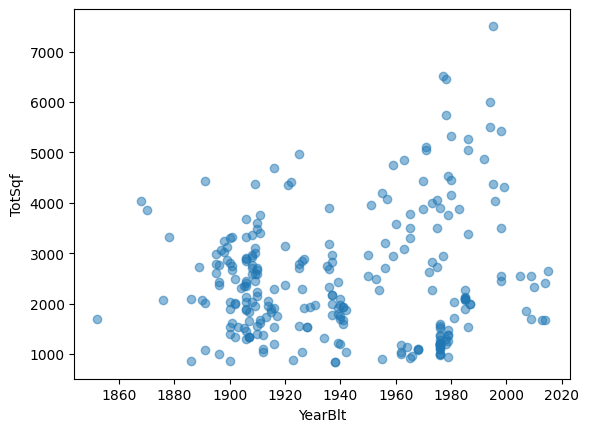

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


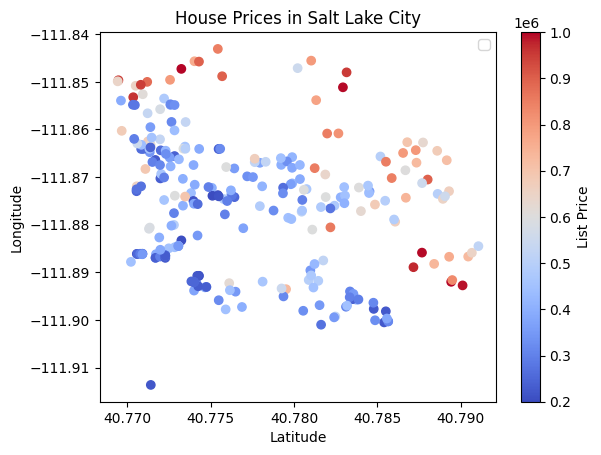

The R Sqaure value of linear_model is 0.9902
The beta_1 of linear_model is 0.9902


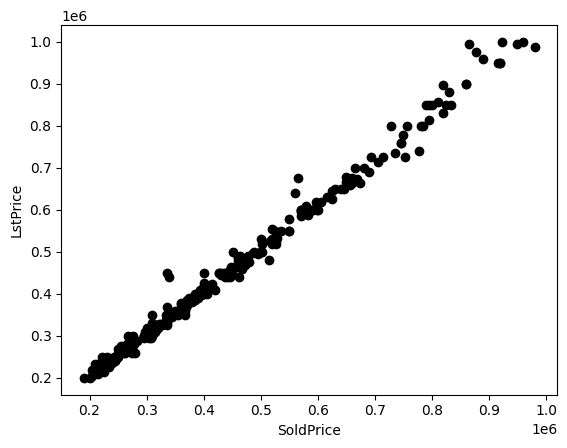

Here the coefficient for TotSqf is positive and hence a larger Total Square Feet is associated with a higher Sold Price on average 43.5121
The coefficient for Garage is positive and statistically significant.
Having an additional Garage space increases the Sold Price of the house, on average.
The coefficient for  Latitude & Longitude is either not positive or not statistically significant.
The presence of  Latitude & Longitude may not have a significant impact on the Sold Price.
Property type is significant in predicting the sold price.
When considering total square footage, property type remains predictive.


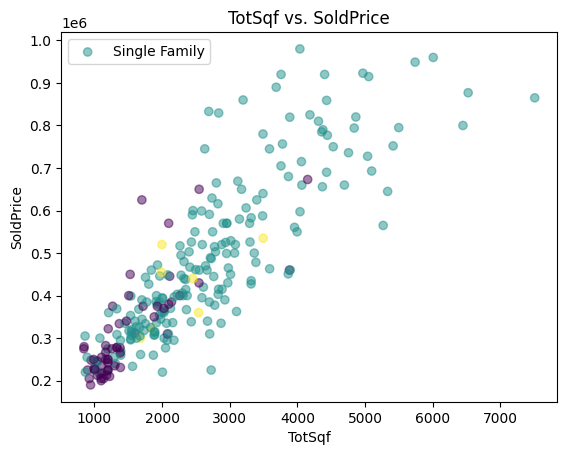

In [2]:
#Part 2: Regression of real estate data

#Task 1: Import the Data
df1 = pd.read_csv('realEstate1.csv')
df2 = pd.read_csv('realEstate2.csv')

df = pd.concat([df1, df2], axis=0)


#Task 2: Clean the Data
print(df.shape)
df = df[(df['LstPrice'] >= 200000) & (df['LstPrice'] <= 1000000)]
print(df.shape)
df = df[['Acres', 'Deck', 'GaragCap', 'Latitude', 'Longitude', 'LstPrice', 'Patio', 'PkgSpacs', 'PropType', 'SoldPrice', 'Taxes', 'TotBed', 'TotBth', 'TotSqf', 'YearBlt']]
print(df.shape)

df['TotSqf'] = df['TotSqf'].str.replace(',','').astype(int)
df['Prop_Type_SingleFamily'] = (df['PropType'] == 'Single Family').astype(int)

df = df[df['Longitude'] != 0]
print(df.shape)
tax_idx = df['Taxes'] == df['Taxes'].max()
df = df[~tax_idx]
tax_idx = df['Taxes'] == df['Taxes'].max()
df = df[~tax_idx]
print(df.shape)

#Task 3: Exploratory Data Analysis
print("After Cleaning up the data we are left with "+str(df.shape[0]) +" houses and " +str(df.shape[1])+" variables")
df['PropType'].value_counts().plot(kind='bar')
plt.show()

#Compute the correlation matrix and use a heat map to visualize the correlation coefficients
original_categories = df['PropType'].astype('category').cat.categories
df['PropType'] = df['PropType'].astype('category').cat.codes

corr = df.corr()
plt.pcolor(corr, vmin=-1, vmax=1, cmap='coolwarm')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation=90)
plt.yticks(range(len(corr)), corr.columns)
plt.show()

df['PropType'] = df['PropType'].map(dict(enumerate(original_categories)))

# Create a subset of the columns
subset_cols = ['Acres', 'LstPrice', 'SoldPrice', 'Taxes', 'TotBed', 'TotBth', 'TotSqf', 'YearBlt']

ad_all_ols = sm.ols(formula="Sales ~ TV + Radio + Newspaper", data=advert).fit()
ad_all_ols.summary()

# Make a scatter plot matrix
for col1 in subset_cols:
    for col2 in subset_cols:
        if col1 != col2:
            corr_coeff = df[col1].corr(df[col2])
            if abs(corr_coeff) > 0.75:
                print('There is a strong correlation between {} and {} (correlation coefficient = {})'.format(col1, col2, corr_coeff))
            plt.scatter(df[col1], df[col2], alpha=0.5)
            plt.xlabel(col1)
            plt.ylabel(col2)
            plt.show()

#Describing your findings.
#LstPrice and SoldPrice have highest R^2 Value which includes 99% of data
# TotSqf and Taxes are other two variables which have good correlation coefficient , So these can be considered to build a model to determine best Sold Price

#Task 4: Geospatial Plot

# Create a scatterplot of latitude vs longitude
plt.scatter(df['Latitude'], df['Longitude'], c=df['LstPrice'], cmap='coolwarm' )
plt.colorbar(label='List Price')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('House Prices in Salt Lake City')
plt.legend()
plt.show()


#The Price Depends on the Longitude and Latitude of Salt Lake City From the graph The highest price houses are located at Longitude (111.85) and Latitude (40.970)
# Most of the Houses are in the region from (-111.90 to -111.86) Longitude and (40.770 to 40.780) Which are of average cost and Houses which are far from city like towards airport have higher cost

#Task 5: Simple Linear Regression
linear_model = sm.ols(formula="SoldPrice ~ LstPrice" , data = df).fit()

print(f"The R Sqaure value of linear_model is " +str(round(linear_model.rsquared,4)))
# Interpretation of R-squared: The R-squared value represents the proportion of the variance in the Sold price that can be explained by the List price. 
# In this case, the R-squared value indicates how well the List price predicts the variation in the Sold price. A higher R-squared value suggests that the List price is a good predictor of the Sold price.


print(f"The beta_1 of linear_model is " +str(round(linear_model.rsquared,4)))
# Interpretation of beta_1: The beta_1 coefficient represents the change in the Sold price for each unit increase in the List price which is 0.9444
# In other words, it quantifies the average change in the Sold price associated with a one-unit increase in the List price, holding other variables constant.


plt.scatter(df['SoldPrice'],df['LstPrice'],color='black',linewidth=1)
plt.xlabel('SoldPrice'); plt.ylabel('LstPrice')
plt.show()

#Task 6: Multilinear Regression

subset_cols = ['Acres', 'Taxes','Latitude * Longitude', 'TotBed', 'TotBth', 'TotSqf', 'YearBlt','GaragCap']
multiLinear_model = sm.ols(formula="SoldPrice ~ " + " + ".join(subset_cols), data=df).fit()


#Often the price per square foot for a house is advertised. 
# Is this what the coefficient for TotSqf is measuring? Provide an interpretation for the coefficient for TotSqf.
print(f"Here the coefficient for TotSqf is positive and hence a larger Total Square Feet is associated with a higher Sold Price on average "+ str(round(multiLinear_model.params['TotSqf'],4)))

#Estimate the value that each Garage space adds to a house.

garage_coefficient = multiLinear_model.params['GaragCap']

if garage_coefficient > 0 and multiLinear_model.pvalues['GaragCap'] < 0.05:
    print("The coefficient for Garage is positive and statistically significant.")
    print("Having an additional Garage space increases the Sold Price of the house, on average.")
else:
    print("The coefficient for Garage is either not positive or not statistically significant.")
    print("The presence of an additional Garage space may not have a significant impact on the Sold Price.")

# Does latitude or longitude have an impact on house price? Explain.    
latitude_coefficient = multiLinear_model.params['Latitude:Longitude']

if latitude_coefficient > 0 and multiLinear_model.pvalues['Latitude:Longitude'] < 0.05:
    print("The coefficient for Latitude & Longitude is positive and statistically significant.")
    print("Based on   Latitude & Longitude the Sold Price of the house increases, on average.")
else:
    print("The coefficient for  Latitude & Longitude is either not positive or not statistically significant.")
    print("The presence of  Latitude & Longitude may not have a significant impact on the Sold Price.")


#If we wanted to start a 'house flipping' company, we'd have to be able to do a better job of predicting the sold price than the list price does.
#  How does your model compare?

#The above model gives us the best Sold price based on the Variables for a already built house for resale as it is , But "House flipping" company either rebuilt or renovates the house
# We don't have a data of Labour cost and construction cost of the new house and renewed house Hence above model cannot predict  the better sold price for house filpping company 



#Task 7: Incorporating a Categorical Variable
regression_model_1 = sm.ols(formula="SoldPrice ~ Prop_Type_SingleFamily", data=df).fit()
p_value = regression_model_1.pvalues['Prop_Type_SingleFamily']

if p_value < 0.05:
    print("Property type is significant in predicting the sold price.")
else:
    print("Property type is not significant in predicting the sold price.")

regression_model_2 = sm.ols(formula="SoldPrice ~ Prop_Type_SingleFamily + TotSqf", data=df).fit()
p_value2 = regression_model_2.pvalues['Prop_Type_SingleFamily']

if p_value2 < p_value:
    print("When considering total square footage, property type is no longer predictive.")
else:
    print("When considering total square footage, property type remains predictive.")


list = df['PropType'].unique()
df['PropType'] = df['PropType'].astype('category')
# Create a scatterplot of TotSqf vs. SoldPrice
plt.scatter(df['TotSqf'], df['SoldPrice'],  c=df['PropType'].cat.codes, alpha=0.5)
plt.xlabel('TotSqf')
plt.ylabel('SoldPrice')
plt.title('TotSqf vs. SoldPrice')
plt.legend(list, loc='upper left')

plt.show()